In [1]:
# To handle data
import pandas as pd
import numpy as np

# For plotting
import matplotlib.pyplot as plt
import seaborn as sns

# for yeo-johnson transformation
import scipy.stats as stats

# To save the model 
import joblib

# for feature scaling
from sklearn.preprocessing import MinMaxScaler

# To divide the data into train and test
from sklearn.model_selection import train_test_split

# To display all of the colomns
pd.pandas.set_option('display.max_columns', None)
print('SETUP COMPLETE')

SETUP COMPLETE


In [2]:
df = pd.read_csv('../UDEMY/train.csv')
print(df.shape)
df.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.columns = [name.lower().replace(' ', '_') for name in df.columns]

In [4]:
df.columns[:5]

Index(['id', 'mssubclass', 'mszoning', 'lotfrontage', 'lotarea'], dtype='object')

In [5]:
# Seperate the data into train and test

X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['id', 'saleprice'], axis=1), 
    df['saleprice'], 
    test_size=0.1,
    random_state=1
)
X_train.shape, X_test.shape

((1314, 79), (146, 79))

In [6]:
# Log transformation of the training and testing target
y_train = np.log(y_train)
y_test = np.log(y_test)

## Categorical variables

In [7]:
# Let's capture categorical variables which are those variable with datatype as Object(O)

cat_vars = [var for var in df.columns if df[var].dtype == 'O']
cat_vars = cat_vars + ['mssubclass']

# Lets's cast all as object since we added mssubclass that was not object
X_train[cat_vars] = X_train[cat_vars].astype('O')
X_test[cat_vars] = X_test[cat_vars].astype('O')

len(cat_vars)

44

In [8]:
# Categorical variables that contains missing values
cat_vars_with_na = [var for var in cat_vars if X_train[var].isnull().sum() >0]
len(cat_vars_with_na)

16

In [9]:
# what are the percentages of missing values per variable?

X_train[cat_vars_with_na].isnull().mean().sort_values(ascending=False)

poolqc          0.995434
miscfeature     0.962709
alley           0.936073
fence           0.808980
fireplacequ     0.475647
garagetype      0.055556
garagefinish    0.055556
garagequal      0.055556
garagecond      0.055556
bsmtexposure    0.026636
bsmtfintype2    0.026636
bsmtqual        0.025875
bsmtcond        0.025875
bsmtfintype1    0.025875
masvnrtype      0.006088
electrical      0.000761
dtype: float64

In [10]:
#Let's capture variable with more than 10% of values missing in string_missing
with_string_missing = [var for var in cat_vars_with_na if X_train[var].isnull().mean() > 0.1]

#Let's capture variable with less than 10% of values missing in frequent_category
frequent_category = [var for var in cat_vars_with_na if X_train[var].isnull().mean() < 0.1]

In [11]:
# Let's just replace the string with Missing
X_train[with_string_missing] = X_train[with_string_missing].fillna('Missing')
X_test[with_string_missing] = X_test[with_string_missing].fillna('Missing')

# Let's replace the frequent category na with the mode

for var in frequent_category:
    mode = X_train[var].mode()[0]
    
    print(var, mode)
    
    X_train[var].fillna(mode, inplace=True)
    X_test[var].fillna(mode, inplace=True)

masvnrtype None
bsmtqual TA
bsmtcond TA
bsmtexposure No
bsmtfintype1 Unf
bsmtfintype2 Unf
electrical SBrkr
garagetype Attchd
garagefinish Unf
garagequal TA
garagecond TA


In [12]:
X_train[cat_vars_with_na].isnull().sum()

alley           0
masvnrtype      0
bsmtqual        0
bsmtcond        0
bsmtexposure    0
bsmtfintype1    0
bsmtfintype2    0
electrical      0
fireplacequ     0
garagetype      0
garagefinish    0
garagequal      0
garagecond      0
poolqc          0
fence           0
miscfeature     0
dtype: int64

## Numecical variables

In [13]:
# Let's capture numerical variables
num_vars = [var for var in df.columns if var not in cat_vars and var not in ['saleprice', 'id']]
len(num_vars)

35

In [14]:
# How many numerical variables have missing values
num_vars_with_na = [var for var in num_vars if X_train[var].isnull().sum() >0]
X_train[num_vars_with_na].isnull().mean()

lotfrontage    0.177321
masvnrarea     0.006088
garageyrblt    0.055556
dtype: float64

In [15]:
# Dealing with the missing values in the numerical variables. First, we create a binary indicate and then replace with mean
for var in num_vars_with_na:
    mean_val = X_train[var].mean()
    
    print(var, mean_val)
    
    #Adding binary indicator to train and test
    X_train[var + '_na'] = np.where(X_train[var].isnull(), 1,0)
    X_test[var + '_na'] = np.where(X_test[var].isnull(), 1,0)
    
    # Replacing na with the mean value
    X_train[var].fillna(mean_val, inplace=True)
    X_test[var].fillna(mean_val, inplace=True)

lotfrontage 70.09343200740055
masvnrarea 103.94640122511485
garageyrblt 1978.7219983883965


In [16]:
X_train[num_vars_with_na].isnull().sum()


lotfrontage    0
masvnrarea     0
garageyrblt    0
dtype: int64

In [17]:
# Also confirming that there's no missing value in the test dataset in another programing format
[var for var in num_vars_with_na if X_test[var].isnull().sum() > 0]

[]

In [18]:
X_train[[var for var in X_train.columns if '_na' in var]].head()

,lotfrontage_na,masvnrarea_na,garageyrblt_na
418,0,0,0
782,0,0,0
1338,0,0,0
931,0,0,0
780,0,0,0


## Temporal variables
for the year variables, we will capture the time difference between the variables aand the year the house was sold

In [19]:
def elapsed_years(df, var):
    df[var] = df['yrsold'] - df[var]
    return df

In [20]:
X_train.columns

Index(['mssubclass', 'mszoning', 'lotfrontage', 'lotarea', 'street', 'alley',
       'lotshape', 'landcontour', 'utilities', 'lotconfig', 'landslope',
       'neighborhood', 'condition1', 'condition2', 'bldgtype', 'housestyle',
       'overallqual', 'overallcond', 'yearbuilt', 'yearremodadd', 'roofstyle',
       'roofmatl', 'exterior1st', 'exterior2nd', 'masvnrtype', 'masvnrarea',
       'exterqual', 'extercond', 'foundation', 'bsmtqual', 'bsmtcond',
       'bsmtexposure', 'bsmtfintype1', 'bsmtfinsf1', 'bsmtfintype2',
       'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'heating', 'heatingqc',
       'centralair', 'electrical', '1stflrsf', '2ndflrsf', 'lowqualfinsf',
       'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath', 'halfbath',
       'bedroomabvgr', 'kitchenabvgr', 'kitchenqual', 'totrmsabvgrd',
       'functional', 'fireplaces', 'fireplacequ', 'garagetype', 'garageyrblt',
       'garagefinish', 'garagecars', 'garagearea', 'garagequal', 'garagecond',
       'paveddrive', 'wo

In [21]:
for var in ['yearbuilt', 'yearremodadd', 'garageyrblt']:
    X_train = elapsed_years(X_train, var)
    X_test = elapsed_years(X_test, var)

In [22]:
# Let's drop year sold as we don't need it again
X_train.drop(['yrsold'], axis=1, inplace=True)
X_test.drop(['yrsold'], axis=1, inplace=True)

## Numerical variable

LET'S PERFORM LOGARITHM TRANSFORMATION ON THE NUMERICAL FEATURES THAT HAVE POSITIVE VALUES

In [23]:
for var in ['lotfrontage', '1stflrsf', 'grlivarea']:
    X_train[var] = np.log(X_train[var])
    X_test[var] = np.log(X_test[var])

In [24]:
[var for var in ['lotfrontage', '1stflrsf', 'grlivarea'] if X_train[var].isnull().sum()>0]

[]

YeoJohnson Transformation on LotArea

In [26]:
# the yeo-johnson transformation learns the best exponent to transform the variable
# it needs to learn it from the train set: 
X_train['lotarea'], param = stats.yeojohnson(X_train['lotarea'])

# and then apply the transformation to the test set with the same
# parameter: see who this time we pass param as argument to the 
# yeo-johnson
X_test['lotarea'] = stats.yeojohnson(X_test['lotarea'], lmbda=param)

print(param)

-12.55283001172003


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1476: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(trans.var(axis=0))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:2555: RuntimeWarning: invalid value encountered in double_scalars
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:2148: RuntimeWarning: invalid value encountered in double_scalars
  tmp1 = (x - w) * (fx - fv)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:2149: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


### Binarize skewed variables

There were a few variables very skewed, we would transform those into binary variables.

In [29]:
skewed = [
    'bsmtfinsf2', 'lowqualfinsf', 'enclosedporch',
    '3ssnporch', 'screenporch', 'miscval'
]

for var in skewed:
    X_train[var] = np.where(X_train[var]==0, 0,1)
    X_test[var] = np.where(X_test[var]==0, 0,1)

## Categorical variables

### Apply mappings

These are variables which values have an assigned order, related to quality. For more information, check Kaggle website.

In [30]:
# re-map strings to numbers, which determine quality

qual_mappings = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5, 'Missing': 0, 'NA': 0}

qual_vars = ['exterqual', 'extercond', 'bsmtqual', 'bsmtcond',
             'heatingqc', 'kitchenqual', 'fireplacequ',
             'garagequal', 'garagecond',
            ]

for var in qual_vars:
    X_train[var] = X_train[var].map(qual_mappings)
    X_test[var] = X_test[var].map(qual_mappings)

In [31]:
exposure_mappings = {'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4}

var = 'bsmtexposure'

X_train[var] = X_train[var].map(exposure_mappings)
X_test[var] = X_test[var].map(exposure_mappings)

In [32]:
finish_mappings = {'Missing': 0, 'NA': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}

finish_vars = ['bsmtfintype1', 'bsmtfintype2']

for var in finish_vars:
    X_train[var] = X_train[var].map(finish_mappings)
    X_test[var] = X_test[var].map(finish_mappings)

In [33]:
garage_mappings = {'Missing': 0, 'NA': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}

var = 'garagefinish'

X_train[var] = X_train[var].map(garage_mappings)
X_test[var] = X_test[var].map(garage_mappings)

In [34]:
fence_mappings = {'Missing': 0, 'NA': 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4}

var = 'fence'

X_train[var] = X_train[var].map(fence_mappings)
X_test[var] = X_test[var].map(fence_mappings)

In [35]:
# check absence of na in the train set
[var for var in X_train.columns if X_train[var].isnull().sum()>0]

[]

In [36]:
# check absence of na in the test set
[var for var in X_test.columns if X_test[var].isnull().sum()>0]

[]

### Removing Rare Labels

For the remaining categorical variables, we will group those categories that are present in less than 1% of the observations. That is, all values of categorical variables that are shared by less than 1% of houses, well be replaced by the string "Rare".

In [37]:
# capture all quality variables

qual_vars  = qual_vars + finish_vars + ['bsmtexposure','garagefinish','fence']

# capture the remaining categorical variables
# (those that we did not re-map)

cat_others = [
    var for var in cat_vars if var not in qual_vars
]

len(cat_others)

30

In [38]:
def find_frequent_labels(df, var, rare_perc):
    
    # function finds the labels that are shared by more than
    # a certain % of the houses in the dataset

    df = df.copy()

    tmp = df.groupby(var)[var].count() / len(df)

    return tmp[tmp > rare_perc].index


for var in cat_others:
    
    # find the frequent categories
    frequent_ls = find_frequent_labels(X_train, var, 0.01)
    
    print(var, frequent_ls)
    print()
    
    # replace rare categories by the string "Rare"
    X_train[var] = np.where(X_train[var].isin(
        frequent_ls), X_train[var], 'Rare')
    
    X_test[var] = np.where(X_test[var].isin(
        frequent_ls), X_test[var], 'Rare')

mszoning Index(['FV', 'RL', 'RM'], dtype='object', name='mszoning')

street Index(['Pave'], dtype='object', name='street')

alley Index(['Grvl', 'Missing', 'Pave'], dtype='object', name='alley')

lotshape Index(['IR1', 'IR2', 'Reg'], dtype='object', name='lotshape')

landcontour Index(['Bnk', 'HLS', 'Low', 'Lvl'], dtype='object', name='landcontour')

utilities Index(['AllPub'], dtype='object', name='utilities')

lotconfig Index(['Corner', 'CulDSac', 'FR2', 'Inside'], dtype='object', name='lotconfig')

landslope Index(['Gtl', 'Mod'], dtype='object', name='landslope')

neighborhood Index(['BrDale', 'BrkSide', 'ClearCr', 'CollgCr', 'Crawfor', 'Edwards',
       'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel', 'NAmes', 'NWAmes', 'NoRidge',
       'NridgHt', 'OldTown', 'SWISU', 'Sawyer', 'SawyerW', 'Somerst',
       'StoneBr', 'Timber'],
      dtype='object', name='neighborhood')

condition1 Index(['Artery', 'Feedr', 'Norm', 'PosN', 'RRAn'], dtype='object', name='condition1')

condition2 Index(['N

### Encoding categorical variables

In [52]:
# this function will assign discrete values to the strings of the variables,
# so that the smaller value corresponds to the category that shows the smaller
# mean house sale price

def replace_categories(train, test, y_train, var, target):
    
    tmp = pd.concat([X_train, y_train], axis=1)
    
    # order the categories in a variable from that with the lowest
    # house sale price, to that with the highest
    ordered_labels = tmp.groupby([var])[target].mean().sort_values().index

    # create a dictionary of ordered categories to integer values
    ordinal_label = {k: i for i, k in enumerate(ordered_labels, 0)}
    
    print(var, ordinal_label)
    print()

    # use the dictionary to replace the categorical strings by integers
    train[var] = train[var].map(ordinal_label)
    test[var] = test[var].map(ordinal_label)

In [53]:
for var in cat_others:
    replace_categories(X_train, X_test, y_train, var, 'saleprice')

mszoning {'Rare': 0, 'RM': 1, 'RL': 2, 'FV': 3}

street {'Rare': 0, 'Pave': 1}

alley {'Grvl': 0, 'Pave': 1, 'Missing': 2}

lotshape {'Reg': 0, 'IR1': 1, 'IR2': 2, 'Rare': 3}

landcontour {'Bnk': 0, 'Lvl': 1, 'Low': 2, 'HLS': 3}

utilities {'Rare': 0, 'AllPub': 1}

lotconfig {'Inside': 0, 'Corner': 1, 'FR2': 2, 'CulDSac': 3, 'Rare': 4}

landslope {'Gtl': 0, 'Mod': 1, 'Rare': 2}

neighborhood {'IDOTRR': 0, 'MeadowV': 1, 'BrDale': 2, 'BrkSide': 3, 'OldTown': 4, 'Edwards': 5, 'Sawyer': 6, 'SWISU': 7, 'NAmes': 8, 'Mitchel': 9, 'Rare': 10, 'SawyerW': 11, 'NWAmes': 12, 'Gilbert': 13, 'CollgCr': 14, 'Crawfor': 15, 'ClearCr': 16, 'Somerst': 17, 'Timber': 18, 'NridgHt': 19, 'StoneBr': 20, 'NoRidge': 21}

condition1 {'Artery': 0, 'Feedr': 1, 'Norm': 2, 'RRAn': 3, 'Rare': 4, 'PosN': 5}

condition2 {'Rare': 0, 'Norm': 1}

bldgtype {'2fmCon': 0, 'Duplex': 1, 'Twnhs': 2, 'TwnhsE': 3, '1Fam': 4}

housestyle {'SFoyer': 0, '1.5Fin': 1, 'Rare': 2, '1Story': 3, 'SLvl': 4, '2Story': 5}

roofstyle {'Gable'

In [54]:
# check absence of na in the train set
[var for var in X_train.columns if X_train[var].isnull().sum() > 0]

[]

In [55]:
# check absence of na in the train set
[var for var in X_test.columns if X_test[var].isnull().sum() > 0]

[]

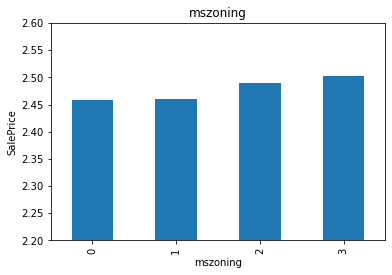

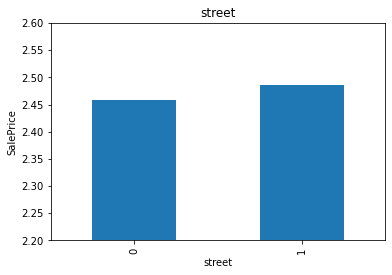

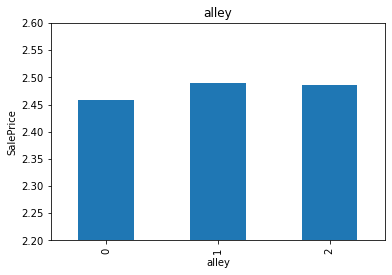

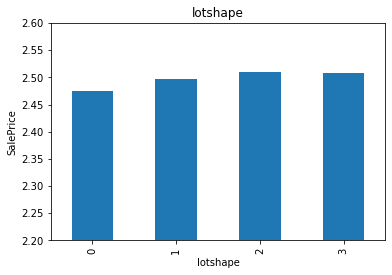

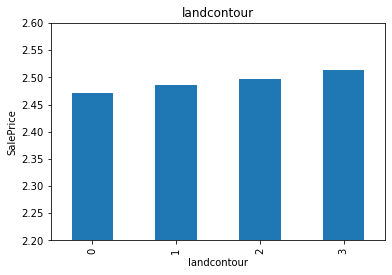

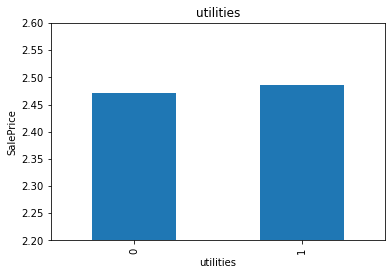

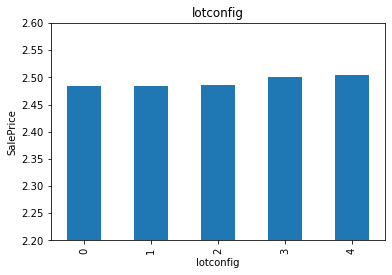

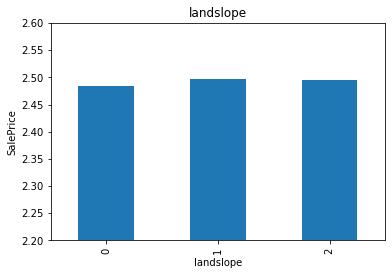

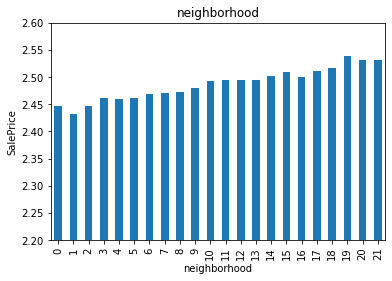

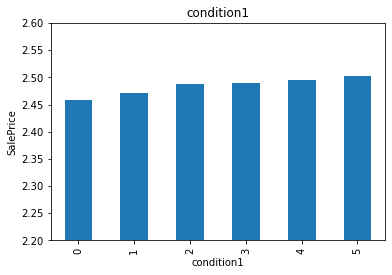

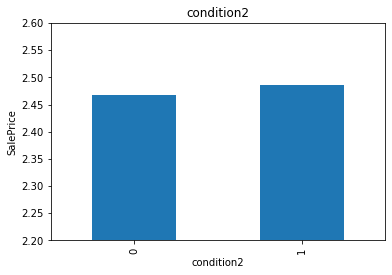

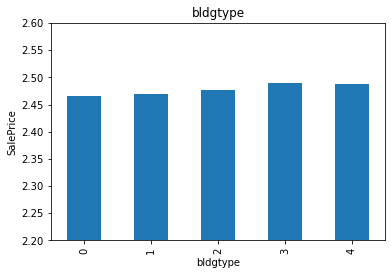

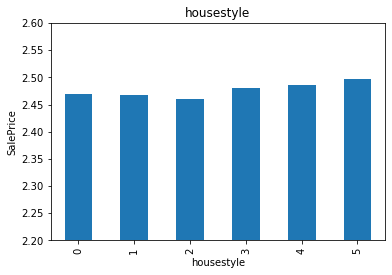

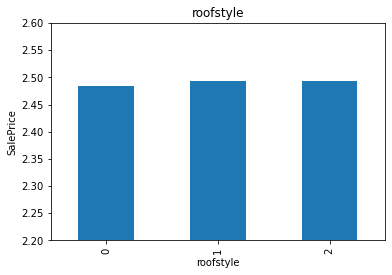

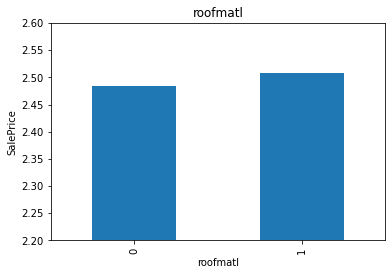

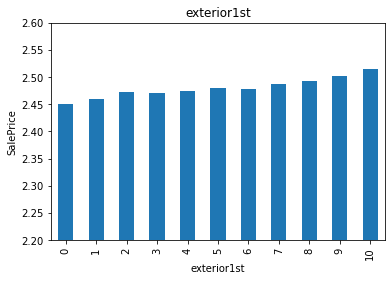

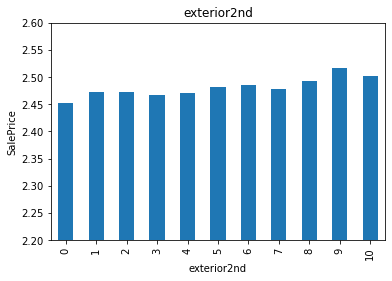

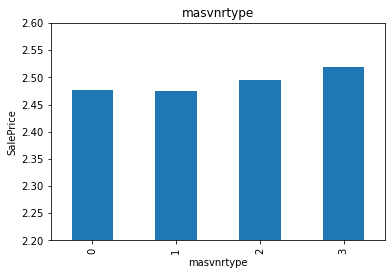

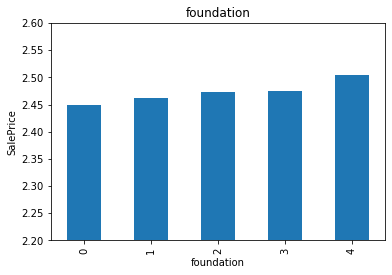

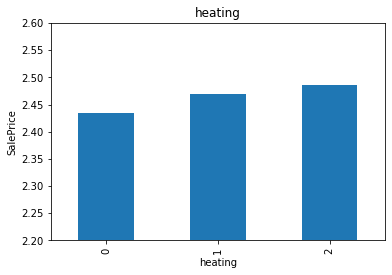

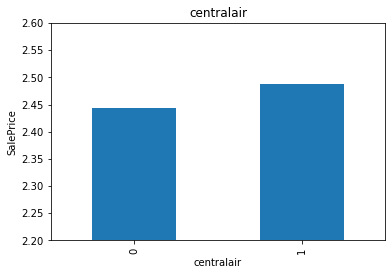

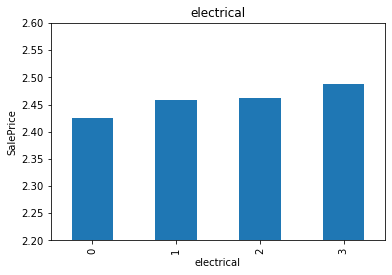

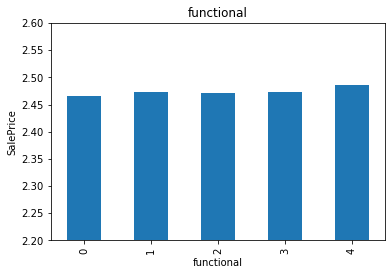

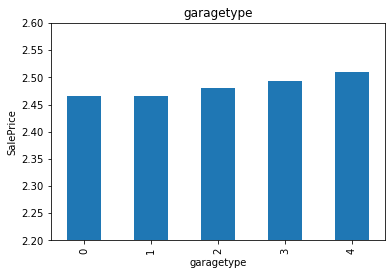

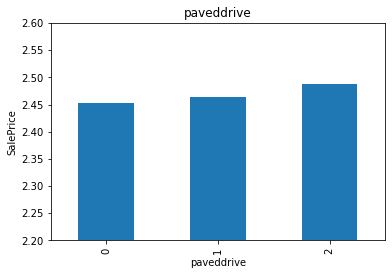

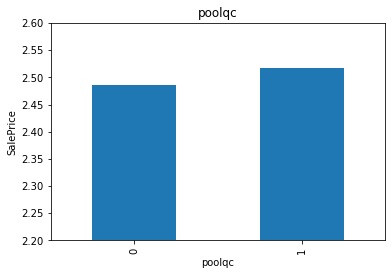

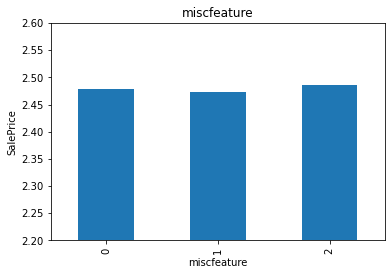

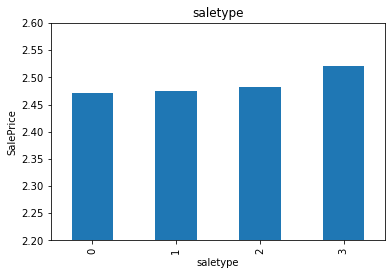

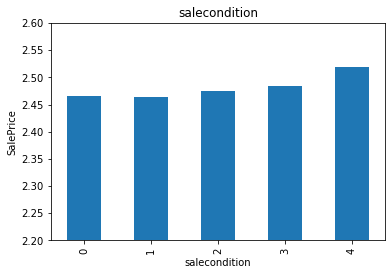

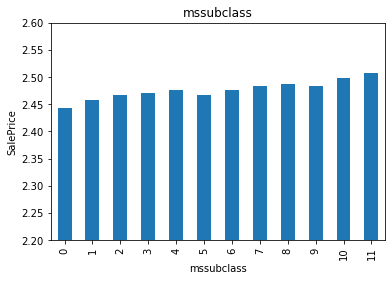

In [56]:
# let me show you what I mean by monotonic relationship
# between labels and target

def analyse_vars(train, y_train, var):
    
    # function plots median house sale price per encoded
    # category
    
    tmp = pd.concat([train, np.log(y_train)], axis=1)
    
    tmp.groupby(var)['saleprice'].median().plot.bar()
    plt.title(var)
    plt.ylim(2.2, 2.6)
    plt.ylabel('SalePrice')
    plt.show()
    
for var in cat_others:
    analyse_vars(X_train, y_train, var)

The monotonic relationship above is particularly clear for the variables MSZoning and Neighborhood. Note how, the higher the integer that now represents the category, the higher the mean house sale price.

(remember that the target is log-transformed, that is why the differences seem so small).

## Feature Scaling

For use in linear models, features need to be either scaled. We will scale features to the minimum and maximum values:

In [57]:
# create scaler
scaler = MinMaxScaler()

#  fit  the scaler to the train set
scaler.fit(X_train) 

# transform the train and test set

# sklearn returns numpy arrays, so we wrap the
# array with a pandas dataframe

X_train = pd.DataFrame(
    scaler.transform(X_train),
    columns=X_train.columns
)

X_test = pd.DataFrame(
    scaler.transform(X_test),
    columns=X_train.columns
)

In [58]:
X_train.head()

,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,saletype,salecondition,lotfrontage_na,masvnrarea_na,garageyrblt_na
0,0.454545,0.666667,0.388581,0.0,1.0,1.0,0.000000,0.333333,1.0,0.00,0.0,0.238095,0.4,1.0,1.0,0.2,0.444444,0.571429,0.492647,0.950820,0.0,0.0,0.3,0.4,0.333333,0.00000,0.333333,0.5,0.25,0.333333,0.666667,0.0,0.8,0.055280,0.0,0.0,0.190068,0.123732,1.0,0.000000,0.0,0.333333,0.309142,0.183051,0.0,0.432412,0.333333,0.0,0.333333,0.5,0.375,0.5,0.333333,0.416667,1.0,0.000000,0.0,0.25,0.626168,0.0,0.25,0.169252,0.5,0.5,0.5,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.272727,0.666667,0.25,0.0,0.0,0.0
1,0.818182,0.666667,0.429425,0.0,1.0,1.0,0.666667,0.333333,1.0,0.00,0.0,0.666667,0.4,1.0,1.0,0.6,0.666667,0.428571,0.058824,0.131148,0.0,0.0,0.9,1.0,0.333333,0.00000,0.666667,0.5,1.00,0.666667,0.666667,0.0,0.0,0.000000,0.0,0.0,0.604880,0.231260,1.0,1.000000,1.0,1.000000,0.550351,0.000000,0.0,0.514455,0.000000,0.0,0.666667,0.0,0.375,0.5,0.666667,0.333333,1.0,0.000000,0.0,0.75,0.074766,0.5,0.50,0.426657,0.5,0.5,1.0,0.000000,0.060329,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.454545,0.666667,0.75,0.0,0.0,0.0
2,1.000000,0.666667,0.558672,0.0,1.0,1.0,0.333333,0.333333,1.0,0.25,0.0,0.666667,0.4,1.0,1.0,1.0,0.666667,0.428571,0.029412,0.081967,0.0,0.0,0.9,1.0,0.333333,0.00000,0.666667,0.5,1.00,0.666667,0.666667,0.0,1.0,0.124026,0.0,0.0,0.092466,0.149918,1.0,1.000000,1.0,1.000000,0.383441,0.455690,0.0,0.607647,0.333333,0.0,0.666667,0.5,0.375,0.5,0.666667,0.500000,1.0,0.000000,0.0,1.00,0.037383,0.5,0.50,0.346968,0.5,0.5,1.0,0.198370,0.166362,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.454545,0.666667,0.75,0.0,0.0,0.0
3,0.818182,0.666667,0.445638,0.0,1.0,1.0,0.000000,0.333333,1.0,0.00,0.0,0.380952,0.4,1.0,1.0,0.6,0.444444,0.571429,0.323529,0.737705,0.0,0.0,0.9,1.0,0.333333,0.00000,0.333333,0.5,0.50,0.333333,0.666667,0.0,0.6,0.059887,0.4,1.0,0.051798,0.151391,1.0,1.000000,1.0,1.000000,0.385492,0.000000,0.0,0.360349,0.000000,0.5,0.333333,0.0,0.250,0.5,0.333333,0.250000,1.0,0.000000,0.0,0.25,0.411215,0.0,0.25,0.302539,0.5,0.5,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.5,1.0,0.0,0.545455,0.666667,0.75,0.0,0.0,0.0
4,0.818182,0.666667,0.406640,0.0,1.0,1.0,0.000000,0.333333,1.0,0.00,0.0,0.619048,0.4,1.0,1.0,0.6,0.666667,0.428571,0.088235,0.196721,0.0,0.0,0.6,0.5,0.666667,0.02375,0.333333,0.5,1.00,0.666667,1.000000,0.0,0.0,0.000000,0.0,0.0,0.529538,0.202455,1.0,0.666667,1.0,1.000000,0.500348,0.000000,0.0,0.467713,0.000000,0.0,0.666667,0.0,0.375,0.5,0.333333,0.333333,1.0,0.333333,0.6,0.75,0.112150,1.0,0.50,0.283498,0.5,0.5,1.0,0.298913,0.038391,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.454545,0.666667,0.75,0.0,0.0,0.0


In [59]:
# let's now save the train and test sets for the next notebook!

X_train.to_csv('xtrain.csv', index=False)
X_test.to_csv('xtest.csv', index=False)

y_train.to_csv('ytrain.csv', index=False)
y_test.to_csv('ytest.csv', index=False)

In [60]:
# now let's save the scaler

joblib.dump(scaler, 'minmax_scaler.joblib') 

['minmax_scaler.joblib']